![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Introducción a Redes Neuronales con Keras
### Se intentará resolver un dataset de Scikit-Learn de clasificación binaria usando una neurona y, posteriormente, se añadirán más neuronas para mejorar la clasificación.


# Se cargan las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se carga el dataset *breast_cancer* de Scikit-Learn
### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [3]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Se crean los sets de features y etiquetas
### Se elijen sólo dos columnas para el set de features

In [5]:
X = df_cancer.iloc[:,[0,1]]
print(X)

     mean radius  mean texture
0          17.99         10.38
1          20.57         17.77
2          19.69         21.25
3          11.42         20.38
4          20.29         14.34
..           ...           ...
564        21.56         22.39
565        20.13         28.25
566        16.60         28.08
567        20.60         29.33
568         7.76         24.54

[569 rows x 2 columns]


In [6]:
y = df_cancer['target']
print(y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64


<Axes: xlabel='mean radius', ylabel='mean texture'>

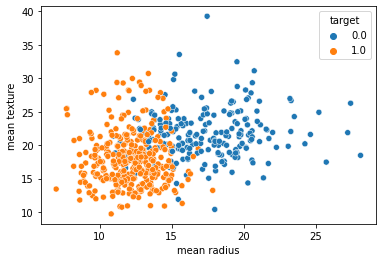

In [7]:
# Feature #1, feature #2, mientras y da el color de las dos clases
sns.scatterplot(x=X['mean radius'],y=X['mean texture'], hue = y)

# Se crean los sets de entrenamiento y de prueba y se escalan ambos sets de features entre 0 y 1
### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# Se escala el set de entrenamiento
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
# Se escala el set de prueba
scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)

<Axes: >

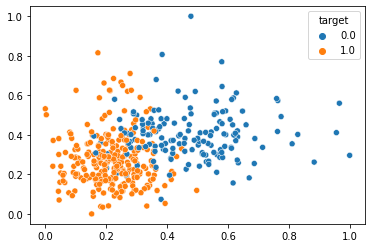

In [9]:
# Se grafican los datos escalados
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train)

# Se cargan las bibliotecas necesarias para definir la red neuronal

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Una sola neurona con dos entradas, una salida.

In [11]:
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

In [12]:
hist = model.fit(x=X_train_scaled, y=y_train, verbose=2, batch_size=50,epochs=100, shuffle='true')

Epoch 1/100
9/9 - 4s - loss: 0.7287 - accuracy: 0.3709 - 4s/epoch - 394ms/step
Epoch 2/100
9/9 - 0s - loss: 0.7033 - accuracy: 0.3803 - 23ms/epoch - 3ms/step
Epoch 3/100
9/9 - 0s - loss: 0.6844 - accuracy: 0.4484 - 30ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 0.6696 - accuracy: 0.6080 - 22ms/epoch - 2ms/step
Epoch 5/100
9/9 - 0s - loss: 0.6566 - accuracy: 0.7864 - 23ms/epoch - 3ms/step
Epoch 6/100
9/9 - 0s - loss: 0.6473 - accuracy: 0.8239 - 24ms/epoch - 3ms/step
Epoch 7/100
9/9 - 0s - loss: 0.6398 - accuracy: 0.7606 - 25ms/epoch - 3ms/step
Epoch 8/100
9/9 - 0s - loss: 0.6324 - accuracy: 0.7230 - 23ms/epoch - 3ms/step
Epoch 9/100
9/9 - 0s - loss: 0.6258 - accuracy: 0.7160 - 23ms/epoch - 3ms/step
Epoch 10/100
9/9 - 0s - loss: 0.6199 - accuracy: 0.7207 - 21ms/epoch - 2ms/step
Epoch 11/100
9/9 - 0s - loss: 0.6140 - accuracy: 0.7324 - 24ms/epoch - 3ms/step
Epoch 12/100
9/9 - 0s - loss: 0.6083 - accuracy: 0.7324 - 22ms/epoch - 2ms/step
Epoch 13/100
9/9 - 0s - loss: 0.6031 - accuracy: 

# Se muestra un resumen del modelo, así como la evaluación de los resultados

In [13]:
# resumen del model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'Epoca')

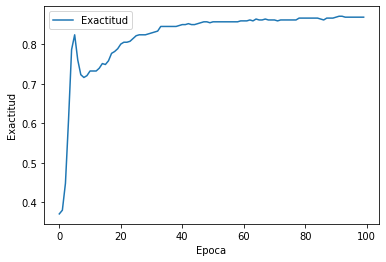

In [14]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

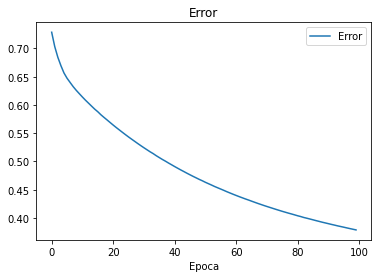

In [15]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

313/313 [==============================] - 0s 1ms/step


<ipython-input-16-899ef49886d6>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


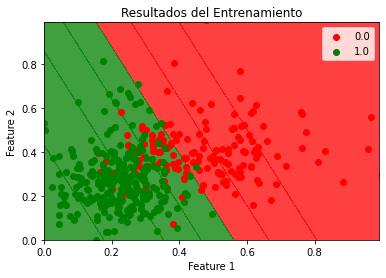

In [16]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Resultados del Entrenamiento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [18]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


<Axes: >

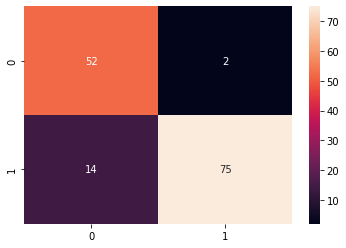

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

# Se deja como ejercicio agregar capas ocultas, incrementar el número de neuronas por capa y repetir el procedimiento. La capa de salida es de una neurona con Sigmoid como la función de activación.

# Gracias por la atención